# Alogrithme de détection des billets basé sur leurs mesures.

modules nécéssaire

In [1]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

Données d'entraiement (absolument nécessaire au foncitonnement de l'outils, faites en sorte que train_data.pkl soit toujours présent avec ce fichier).

In [2]:
# Importer les données depuis le fichier pickle
with open('train_data.pkl', 'rb') as f:
    X_train, y_train = pickle.load(f)

# Afficher les premières lignes pour vérifier
print(X_train.head())


      diagonal  height_left  height_right  margin_low  margin_up    length
382   1.053972     1.972418     -0.369585   -0.611778  -0.308426  0.666522
538  -0.191548     1.571565     -1.321911   -0.611778  -1.430393  0.941613
1493 -1.076523     1.003691      2.118753    0.593793   0.856694 -0.594311
1112  0.332882     0.836669      1.197146    1.693877   0.511473 -1.224728
324   0.463989     1.304330     -0.983989   -0.461082  -1.128325  0.735295


In [3]:
print(y_train.head())

382      True
538      True
1493    False
1112    False
324      True
Name: is_genuine, dtype: bool


In [4]:
#Générer un dataframe aléatoire pour l'exemple
np.random.seed(42)  # Pour la reproductibilité
df_for_test = pd.DataFrame(np.random.randn(150, 6), columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

df_for_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137
1,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730
2,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247
3,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
4,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694


Retirer les croisillions et importer les données à tester.

In [5]:
#filename = "https://--address--.csv"
#df_for_test = pd.read_csv(filename)

#df_for_test=pd.read_csv('billets.csv',delimiter=';')
#df_for_test.dropna(inplace=True)

 ## Fonction de détection

In [6]:

def detect_genuine_bills(input_df):
    # Columns to standardize
    columns_to_standardize = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Standardize the selected columns
    input_df[columns_to_standardize] = scaler.fit_transform(input_df[columns_to_standardize])
    
    # Define the features and target
    X = input_df[columns_to_standardize]
    
    # Initialize the RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)
    
    # Train the model (assuming we have the training data X_train and y_train)
    # Note: Replace X_train and y_train with your actual training data
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    predictions = rf_model.predict(X)
    
    # Create a new dataframe with the predictions
    result_df = input_df.copy()
    result_df['is_genuine'] = predictions
    
    return result_df


##############################################################################################
##############################################################################################



result_df = detect_genuine_bills(df_for_test) # <----- CHANGEZ random_df par le nom des données à tester


result_df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.413041,-0.046022,0.708955,1.688479,-0.174744,-0.405308,False
1,1.643561,0.887110,-0.401182,0.601056,-0.396924,-0.626871,False
2,0.123454,-1.874802,-1.648730,-0.624311,-0.929361,0.119326,True
3,-1.183782,-1.358652,1.521772,-0.251092,0.117616,-1.544356,False
4,-0.770416,0.210712,-1.078415,0.415993,-0.529905,-0.460372,False


Nouveau dataframe avec l'authentification.

In [7]:
result_df

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.413041,-0.046022,0.708955,1.688479,-0.174744,-0.405308,False
1,1.643561,0.887110,-0.401182,0.601056,-0.396924,-0.626871,False
2,0.123454,-1.874802,-1.648730,-0.624311,-0.929361,0.119326,True
3,-1.183782,-1.358652,1.521772,-0.251092,0.117616,-1.544356,False
4,-0.770416,0.210712,-1.078415,0.415993,-0.529905,-0.460372,False
...,...,...,...,...,...,...,...
145,-0.352737,-0.726047,-1.305305,-0.811350,0.020071,1.535526,True
146,-0.739984,0.326996,0.049021,1.317339,2.501028,-0.689189,False
147,-0.707960,1.172218,0.742943,2.047464,0.618060,-0.525043,False
148,0.519827,1.238715,0.880662,0.561921,1.085890,0.937343,True


compte des valeurs vrais ou fausse

In [8]:
result_df['is_genuine'].value_counts()

is_genuine
True     82
False    68
Name: count, dtype: int64

sauvegarde des billets authentifiés.
Attention, les billets ayant des valeurs manquantes n'on pas été authentifiés.

In [9]:
# Ajouter la colonne is_genuine de result_df à random_df
df_for_test['is_genuine'] = result_df['is_genuine']

# Sauvegarder le dataframe en tant que fichier CSV
df_for_test.to_csv('billets_authentifies.csv', index=False)

## répartition visuelle des vrais et faux.

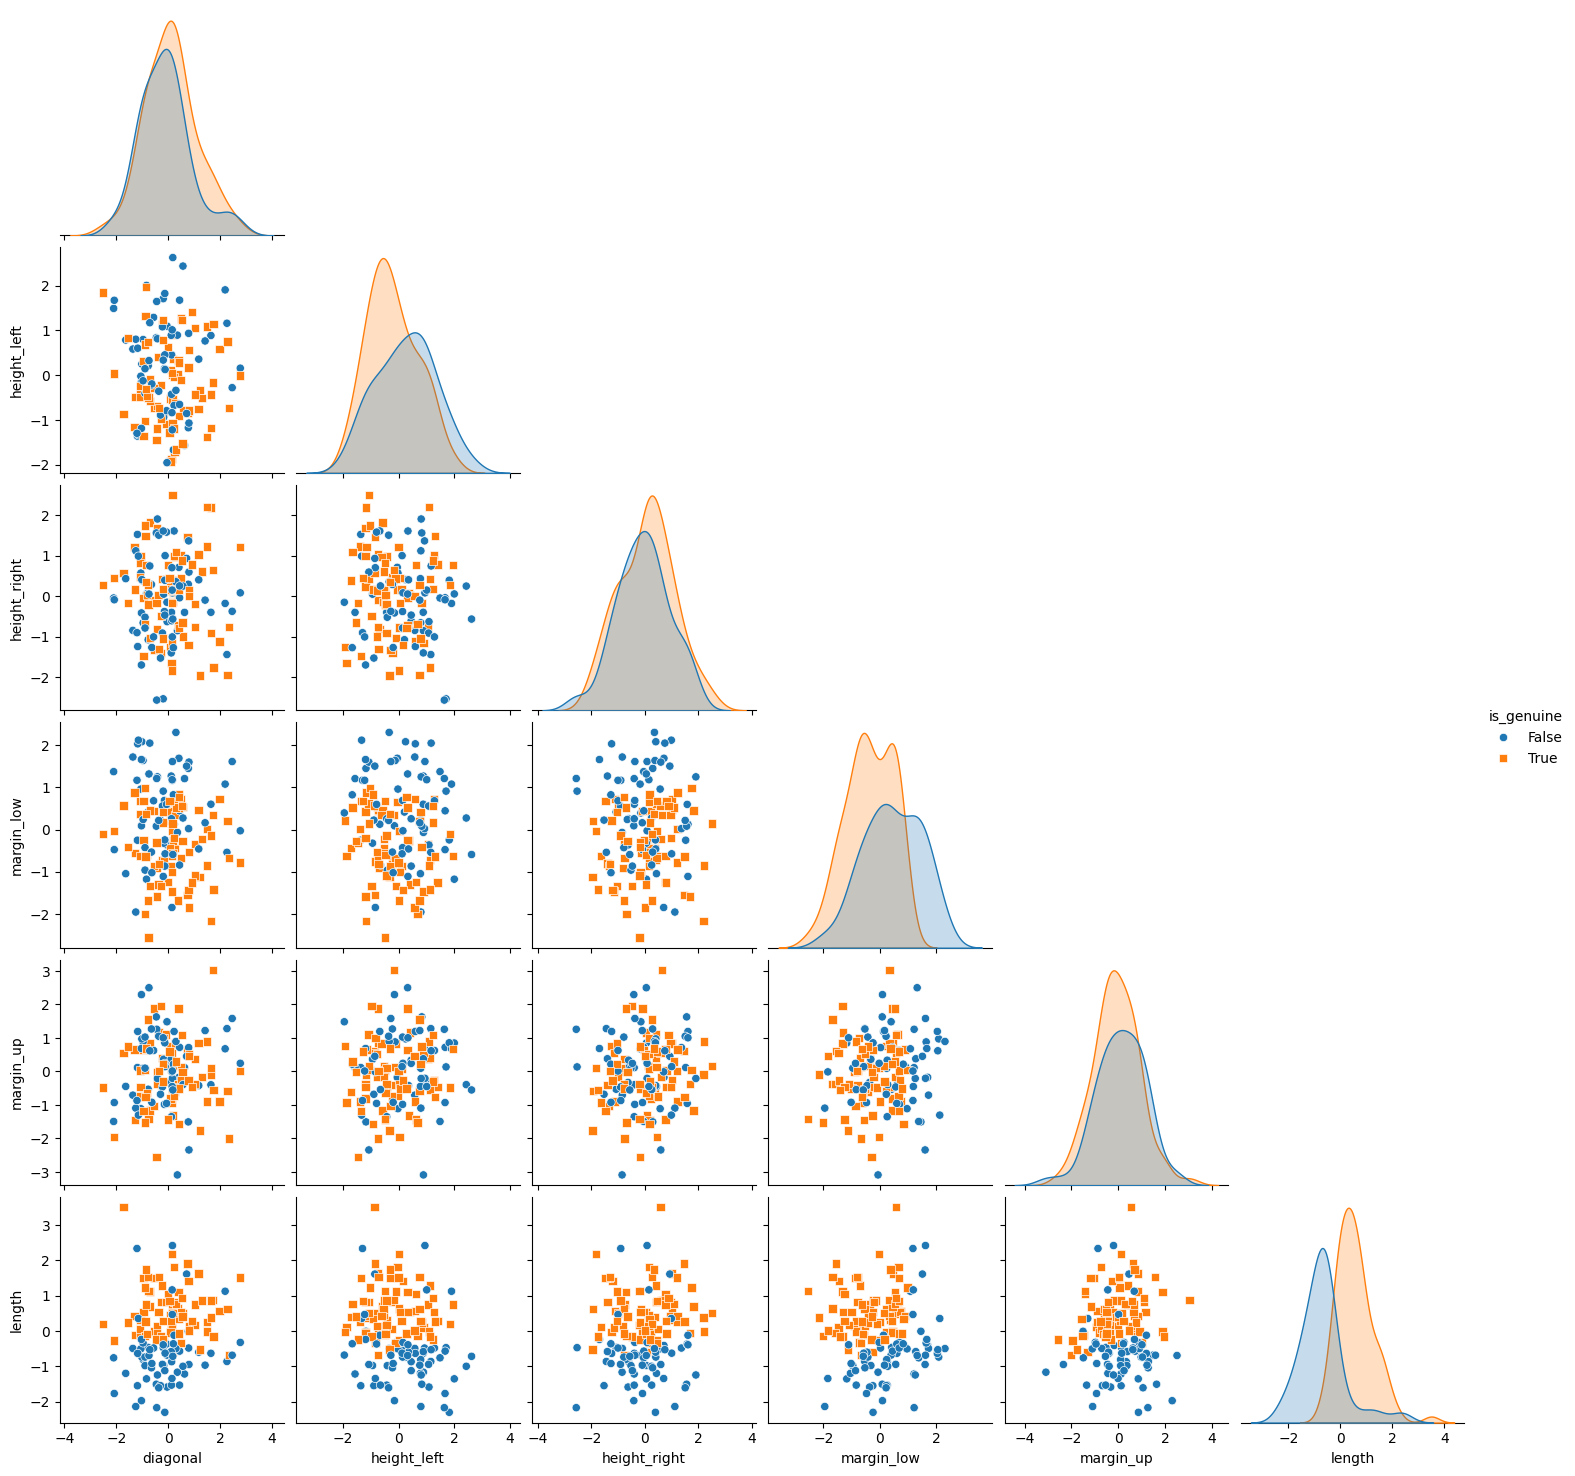

In [10]:
sns.pairplot(result_df, hue='is_genuine', markers=['o', 's'], corner=True)
plt.show()

comparaison des mesures entre les vrais et faux billets

        PC1       PC2  is_genuine
0  0.049059  1.121749       False
1 -0.683299 -0.514675       False
2  0.862745 -1.592545        True
3  0.057731  1.042760       False
4 -0.956025 -0.290585       False


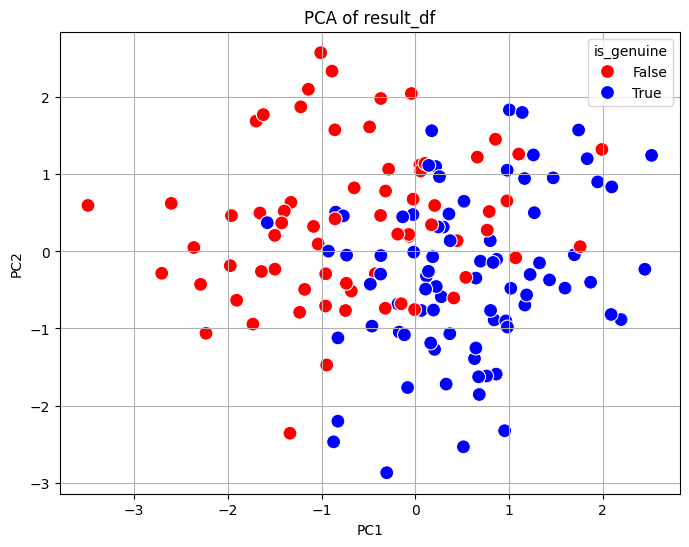

In [11]:
from sklearn.decomposition import PCA

# Sélectionner les colonnes numériques pour la PCA
numeric_cols_result_df = result_df.select_dtypes(include=['float64']).columns

# Initialiser la PCA avec le nombre de composantes souhaité (par exemple, 2)
pca_result_df = PCA(n_components=2)

# Appliquer la PCA sur les colonnes numériques
principal_components_result_df = pca_result_df.fit_transform(result_df[numeric_cols_result_df])

# Créer un DataFrame avec les composantes principales
df_pca_result = pd.DataFrame(data=principal_components_result_df, columns=['PC1', 'PC2'])

# Ajouter la colonne 'is_genuine' pour la visualisation
df_pca_result['is_genuine'] = result_df['is_genuine'].values

# Afficher les premières lignes du DataFrame résultant
print(df_pca_result.head())

# Visualiser les résultats de la PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_result, x='PC1', y='PC2',hue='is_genuine', palette=['red', 'blue'],s=100)
plt.title('PCA of result_df')
plt.grid()
plt.show()

répartition des vrais et faux billets sur un plan en deux dimension.